# Projeto acadêmico - Regressão de VALE3
### Etapa: ETL

In [1024]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [1025]:
# Importando os arquivos a serem utilizados
desocupacao = pd.read_excel("desocupacao.xlsx", header = 3).T
incc = pd.read_csv("INCC.csv", sep = ';', header=0)
minerio = pd.read_csv("TIOc1.csv")
pib = pd.read_excel("pib.xlsx")
vale = pd.read_csv("VALE3.csv")

<b> Fontes dos dados utilizados: </b>
<p> Desocupação: https://sidra.ibge.gov.br/tabela/6380
<p> INCC: https://extra-ibre.fgv.br/IBRE/sitefgvdados/NaoIdentificado.aspx
<p> Minério: https://br.investing.com/commodities/iron-ore-62-cfr-futures-historical-data
<p> VALE3: https://br.investing.com/equities/vale-on-n1-historical-data

### Limpando os dados de 'desocupacao'

In [1026]:
desocupacao.head()

,0,1
Unnamed: 0,Brasil,Fonte: IBGE - Pesquisa Nacional por Amostra de...
jan-fev-mar 2012,5.0,NaN
fev-mar-abr 2012,4.9,NaN
mar-abr-mai 2012,4.8,NaN
abr-mai-jun 2012,4.8,NaN


In [1027]:
desocupacao.tail()

,0,1
abr-mai-jun 2022,5.8,NaN
mai-jun-jul 2022,5.7,NaN
jun-jul-ago 2022,5.6,NaN
jul-ago-set 2022,5.5,NaN
ago-set-out 2022,5.2,NaN


In [1028]:
desocupacao = desocupacao.drop('Unnamed: 0')
desocupacao.reset_index(inplace = True)
desocupacao.columns = ['data', 'desocupacao_trim', 'x']
desocupacao = desocupacao.drop(columns={'x'})
desocupacao

,data,desocupacao_trim
0,jan-fev-mar 2012,5.0
1,fev-mar-abr 2012,4.9
2,mar-abr-mai 2012,4.8
3,abr-mai-jun 2012,4.8
4,mai-jun-jul 2012,4.7
...,...,...
123,abr-mai-jun 2022,5.8
124,mai-jun-jul 2022,5.7
125,jun-jul-ago 2022,5.6
126,jul-ago-set 2022,5.5


In [1029]:
desocupacao.dtypes

data                object
desocupacao_trim    object
dtype: object

In [1030]:
desocupacao['desocupacao_trim'] = pd.to_numeric(desocupacao['desocupacao_trim'], downcast="signed")
desocupacao

,data,desocupacao_trim
0,jan-fev-mar 2012,5.0
1,fev-mar-abr 2012,4.9
2,mar-abr-mai 2012,4.8
3,abr-mai-jun 2012,4.8
4,mai-jun-jul 2012,4.7
...,...,...
123,abr-mai-jun 2022,5.8
124,mai-jun-jul 2022,5.7
125,jun-jul-ago 2022,5.6
126,jul-ago-set 2022,5.5


### Limpando os dados de 'INCC'

In [1031]:
incc.head()

,Data,INCC-DI
0,jan/00,"184,039"
1,fev/00,"185,461"
2,mar/00,"186,492"
3,abr/00,"187,604"
4,mai/00,"190,136"


In [1032]:
incc.tail()

,Data,INCC-DI
270,jul/22,"1043,76"
271,ago/22,"1044,679"
272,set/22,"1045,616"
273,out/22,"1046,896"
274,nov/22,"1050,701"


In [1033]:
incc = incc.set_index('Data')
incc.columns = ['INCC']
incc

,INCC
Data,
jan/00,"184,039"
fev/00,"185,461"
mar/00,"186,492"
abr/00,"187,604"
mai/00,"190,136"
...,...
jul/22,"1043,76"
ago/22,"1044,679"
set/22,"1045,616"


In [1034]:
incc.dtypes

INCC    object
dtype: object

In [1035]:
# Conversão de ',' para '.' para transformação posterior da coluna em INT

def converter_pontuacao (x):
    x = x.replace(",", ".")
    return x

incc['INCC'] = incc['INCC'].apply(converter_pontuacao)
incc

,INCC
Data,
jan/00,184.039
fev/00,185.461
mar/00,186.492
abr/00,187.604
mai/00,190.136
...,...
jul/22,1043.76
ago/22,1044.679
set/22,1045.616


In [1036]:
incc['INCC'] = pd.to_numeric(incc['INCC'], downcast="signed")
incc

,INCC
Data,
jan/00,184.039
fev/00,185.461
mar/00,186.492
abr/00,187.604
mai/00,190.136
...,...
jul/22,1043.760
ago/22,1044.679
set/22,1045.616


In [1037]:
incc.dtypes

INCC    float64
dtype: object

### Limpando os dados de 'minerio'

In [1038]:
minerio.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,06.12.2022,"108,49","108,49","108,49","108,49",NaN,"0,75%"
1,05.12.2022,"107,68","107,68","107,68","107,68",NaN,"0,22%"
2,02.12.2022,"107,44","107,44","107,44","107,44",NaN,"4,21%"
3,01.12.2022,"103,10","103,10","103,10","103,10",NaN,"10,56%"
4,30.11.2022,"93,25","93,25","93,25","93,25",NaN,"0,38%"


In [1039]:
minerio.tail()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
3035,29.10.2010,"147,50","147,50","147,50","147,50",NaN,"2,43%"
3036,28.10.2010,"144,00","144,00","144,00","144,00",NaN,"-0,35%"
3037,27.10.2010,"144,50","144,50","144,50","144,50",NaN,"-0,41%"
3038,26.10.2010,"145,10","145,10","145,10","145,10",NaN,"0,07%"
3039,25.10.2010,"145,00","145,00","145,00","145,00",NaN,"0,76%"


In [1040]:
minerio = minerio.set_index('Data')
minerio = minerio.drop(columns={'Abertura', 'Máxima', 'Mínima', 'Vol.', 'Var%'})
minerio.columns = ['cotacao_minerio']
minerio

,cotacao_minerio
Data,
06.12.2022,"108,49"
05.12.2022,"107,68"
02.12.2022,"107,44"
01.12.2022,"103,10"
30.11.2022,"93,25"
...,...
29.10.2010,"147,50"
28.10.2010,"144,00"
27.10.2010,"144,50"


In [1041]:
# Conversão de ',' para '.' para transformação posterior da coluna em FLOAT

def converter_pontuacao (x):
    x = x.replace(",", ".")
    return x

minerio['cotacao_minerio'] = minerio['cotacao_minerio'].apply(converter_pontuacao)
minerio

,cotacao_minerio
Data,
06.12.2022,108.49
05.12.2022,107.68
02.12.2022,107.44
01.12.2022,103.10
30.11.2022,93.25
...,...
29.10.2010,147.50
28.10.2010,144.00
27.10.2010,144.50


In [1042]:
minerio['cotacao_minerio'] = pd.to_numeric(minerio['cotacao_minerio'], downcast="signed")
minerio

,cotacao_minerio
Data,
06.12.2022,108.49
05.12.2022,107.68
02.12.2022,107.44
01.12.2022,103.10
30.11.2022,93.25
...,...
29.10.2010,147.50
28.10.2010,144.00
27.10.2010,144.50


In [1043]:
minerio.dtypes

cotacao_minerio    float64
dtype: object

### Limpando os dados de 'VALE'

In [1044]:
vale.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,31.03.2020,"32,29","31,60","33,24","31,54","39,03M","3,49%"
1,30.03.2020,"31,20","30,57","31,61","30,43","31,19M","4,14%"
2,27.03.2020,"29,96","29,36","30,96","29,28","32,16M","-4,49%"
3,26.03.2020,"31,37","30,64","31,68","29,87","35,39M","2,79%"
4,25.03.2020,"30,52","28,53","30,89","28,45","37,93M","8,53%"


In [1045]:
vale.tail()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
4995,12.01.2000,"1,82","1,80","1,83","1,80","3,80M","1,11%"
4996,11.01.2000,"1,80","1,80","1,81","1,78","247,46K","0,00%"
4997,10.01.2000,"1,80","1,76","1,80","1,76","2,24M","8,43%"
4998,07.01.2000,"1,66","1,62","1,67","1,62","4,02M","3,75%"
4999,06.01.2000,"1,60","1,60","1,64","1,60","599,36K","0,00%"


In [1046]:
vale = vale.set_index('Data')
vale = vale.drop(columns={'Abertura', 'Máxima', 'Mínima', 'Vol.', 'Var%'})
vale.columns = ['cotacao_VALE3']
vale

,cotacao_VALE3
Data,
31.03.2020,"32,29"
30.03.2020,"31,20"
27.03.2020,"29,96"
26.03.2020,"31,37"
25.03.2020,"30,52"
...,...
12.01.2000,"1,82"
11.01.2000,"1,80"
10.01.2000,"1,80"


In [1047]:
vale['cotacao_VALE3'] = vale['cotacao_VALE3'].apply(converter_pontuacao)
vale

,cotacao_VALE3
Data,
31.03.2020,32.29
30.03.2020,31.20
27.03.2020,29.96
26.03.2020,31.37
25.03.2020,30.52
...,...
12.01.2000,1.82
11.01.2000,1.80
10.01.2000,1.80


In [1048]:
vale['cotacao_VALE3'] = pd.to_numeric(vale['cotacao_VALE3'], downcast="signed")
vale

,cotacao_VALE3
Data,
31.03.2020,32.29
30.03.2020,31.20
27.03.2020,29.96
26.03.2020,31.37
25.03.2020,30.52
...,...
12.01.2000,1.82
11.01.2000,1.80
10.01.2000,1.80


In [1049]:
vale.dtypes

cotacao_VALE3    float64
dtype: object

### Limpando os dados de 'PIB'

In [1050]:
pib.head()

,Data,Unnamed: 1,PIB real
0,1997 T1,NaN,3.40
1,1997 T2,NaN,4.75
2,1997 T3,NaN,1.79
3,1997 T4,NaN,3.74
4,1998 T1,NaN,1.01


In [1051]:
pib = pib.set_index('Data')
pib = pib.drop(columns={'Unnamed: 1'})
pib.columns = ['PIB_trimestral']
pib

,PIB_trimestral
Data,
1997 T1,3.40
1997 T2,4.75
1997 T3,1.79
1997 T4,3.74
1998 T1,1.01
...,...
2021 T3,4.43
2021 T4,2.13
2022 T1,2.43


####   - Dentre todos os dados, a data de Março de 2012 (Tri) é a mais antiga constante em 'Desocupados'. Utilizaremnos esta data como inicial para padronização.
####  - Para a data mais recente, definiremos como Março de 2020 por ser o dado mais recente encontrado dentre os dados das cotações de 'VALE3'.

### Ajustando as datas de 'desocupacao'

In [1052]:
desocupacao

,data,desocupacao_trim
0,jan-fev-mar 2012,5.0
1,fev-mar-abr 2012,4.9
2,mar-abr-mai 2012,4.8
3,abr-mai-jun 2012,4.8
4,mai-jun-jul 2012,4.7
...,...,...
123,abr-mai-jun 2022,5.8
124,mai-jun-jul 2022,5.7
125,jun-jul-ago 2022,5.6
126,jul-ago-set 2022,5.5


In [1053]:
# Convertendo as datas para ingles para posterior ajustes através da bibilioteca DateTime
def converter_data (x):
    x = x.replace("fev", "feb")
    x = x.replace("abr", "apr")
    x = x.replace("mai", "may")
    x = x.replace("ago", "aug")
    x = x.replace("set", "sep")
    x = x.replace("out", "oct")
    x = x.replace("dez", "dec")
    return x[8:11] + x[-4:]

desocupacao['data'] = desocupacao['data'].apply(converter_data)

desocupacao

,data,desocupacao_trim
0,mar2012,5.0
1,apr2012,4.9
2,may2012,4.8
3,jun2012,4.8
4,jul2012,4.7
...,...,...
123,jun2022,5.8
124,jul2022,5.7
125,aug2022,5.6
126,sep2022,5.5


In [1054]:
# Formatando as datas para o padrão DateTime

def formatar_data (x):
    data_temp = datetime.datetime.strptime(x, "%b%Y")
    return data_temp

desocupacao['data'] = desocupacao['data'].apply(formatar_data)

desocupacao

,data,desocupacao_trim
0,2012-03-01,5.0
1,2012-04-01,4.9
2,2012-05-01,4.8
3,2012-06-01,4.8
4,2012-07-01,4.7
...,...,...
123,2022-06-01,5.8
124,2022-07-01,5.7
125,2022-08-01,5.6
126,2022-09-01,5.5


In [1055]:
# Filtrando apenas para o período desejado

data_inicial = datetime.datetime(2012,3,1)
data_final = datetime.datetime(2020,3,1)
selecao = (desocupacao['data'] <= data_final)

desocupacao = desocupacao[selecao]
desocupacao

,data,desocupacao_trim
0,2012-03-01,5.0
1,2012-04-01,4.9
2,2012-05-01,4.8
3,2012-06-01,4.8
4,2012-07-01,4.7
...,...,...
92,2019-11-01,7.2
93,2019-12-01,7.0
94,2020-01-01,7.2
95,2020-02-01,7.4


### Ajustando as datas de 'INCC'

In [1056]:
incc

,INCC
Data,
jan/00,184.039
fev/00,185.461
mar/00,186.492
abr/00,187.604
mai/00,190.136
...,...
jul/22,1043.760
ago/22,1044.679
set/22,1045.616


In [1057]:
incc.reset_index(inplace = True)
incc

,Data,INCC
0,jan/00,184.039
1,fev/00,185.461
2,mar/00,186.492
3,abr/00,187.604
4,mai/00,190.136
...,...,...
270,jul/22,1043.760
271,ago/22,1044.679
272,set/22,1045.616
273,out/22,1046.896


In [1058]:
# Convertendo as datas para ingles para posterior ajustes através da bibilioteca DateTime
def converter_data_2 (x):
    x = x.replace("fev", "feb")
    x = x.replace("abr", "apr")
    x = x.replace("mai", "may")
    x = x.replace("ago", "aug")
    x = x.replace("set", "sep")
    x = x.replace("out", "oct")
    x = x.replace("dez", "dec")
    return x[0:3] + x[-2:]

incc['Data'] = incc['Data'].apply(converter_data_2)

incc

,Data,INCC
0,jan00,184.039
1,feb00,185.461
2,mar00,186.492
3,apr00,187.604
4,may00,190.136
...,...,...
270,jul22,1043.760
271,aug22,1044.679
272,sep22,1045.616
273,oct22,1046.896


In [1059]:
# Formatando as datas para o padrão DateTime

def formatar_data_2 (x):
    data_temp = datetime.datetime.strptime(x, "%b%y")
    return data_temp

incc['Data'] = incc['Data'].apply(formatar_data_2)

incc

,Data,INCC
0,2000-01-01,184.039
1,2000-02-01,185.461
2,2000-03-01,186.492
3,2000-04-01,187.604
4,2000-05-01,190.136
...,...,...
270,2022-07-01,1043.760
271,2022-08-01,1044.679
272,2022-09-01,1045.616
273,2022-10-01,1046.896


In [1060]:
# Filtrando apenas para o período desejado

# data_inicial e data_final declarados previamente
selecao = (incc['Data'] <= data_final)
incc = incc[selecao]

selecao = (incc['Data'] >= data_inicial)
incc = incc[selecao]

incc.reset_index(inplace = True, drop = True)

incc

,Data,INCC
0,2012-03-01,496.079
1,2012-04-01,499.791
2,2012-05-01,509.184
3,2012-06-01,512.903
4,2012-07-01,516.318
...,...,...
92,2019-11-01,775.225
93,2019-12-01,776.839
94,2020-01-01,779.766
95,2020-02-01,782.336


### Ajustando as datas de 'minerio'

In [1061]:
minerio

,cotacao_minerio
Data,
06.12.2022,108.49
05.12.2022,107.68
02.12.2022,107.44
01.12.2022,103.10
30.11.2022,93.25
...,...
29.10.2010,147.50
28.10.2010,144.00
27.10.2010,144.50


In [1062]:
# Invertendo a ordem para que fique com a data crescente e adicionando index

minerio = minerio[::-1]
minerio.reset_index(inplace = True)

minerio

,Data,cotacao_minerio
0,25.10.2010,145.00
1,26.10.2010,145.10
2,27.10.2010,144.50
3,28.10.2010,144.00
4,29.10.2010,147.50
...,...,...
3035,30.11.2022,93.25
3036,01.12.2022,103.10
3037,02.12.2022,107.44
3038,05.12.2022,107.68


In [1063]:
# Formatando as datas para o padrão DateTime

def formatar_data_3 (x):
    data_temp = datetime.datetime.strptime(x, "%d.%m.%Y")
    return data_temp

minerio['Data'] = minerio['Data'].apply(formatar_data_3)

minerio

C:\Users\Pichau\AppData\Local\Temp\ipykernel_12544\789712283.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  minerio['Data'] = minerio['Data'].apply(formatar_data_3)


,Data,cotacao_minerio
0,2010-10-25,145.00
1,2010-10-26,145.10
2,2010-10-27,144.50
3,2010-10-28,144.00
4,2010-10-29,147.50
...,...,...
3035,2022-11-30,93.25
3036,2022-12-01,103.10
3037,2022-12-02,107.44
3038,2022-12-05,107.68


In [1064]:
# Filtrando apenas para o período desejado

# data_inicial e data_final declarados previamente
selecao = (minerio['Data'] <= data_final)
minerio = minerio[selecao]

selecao = (minerio['Data'] >= data_inicial)
minerio = minerio[selecao]

minerio.reset_index(inplace = True, drop = True)

minerio

,Data,cotacao_minerio
0,2012-03-01,139.30
1,2012-03-02,139.50
2,2012-03-05,137.90
3,2012-03-06,138.20
4,2012-03-07,138.80
...,...,...
2001,2020-02-24,86.56
2002,2020-02-25,86.73
2003,2020-02-26,86.67
2004,2020-02-27,86.58


## Ajustando as datas de 'Vale'

In [1065]:
vale

,cotacao_VALE3
Data,
31.03.2020,32.29
30.03.2020,31.20
27.03.2020,29.96
26.03.2020,31.37
25.03.2020,30.52
...,...
12.01.2000,1.82
11.01.2000,1.80
10.01.2000,1.80


In [1066]:
# Invertendo a ordem para que fique com a data crescente e adicionando index

vale = vale[::-1]
vale.reset_index(inplace = True)

vale

,Data,cotacao_VALE3
0,06.01.2000,1.60
1,07.01.2000,1.66
2,10.01.2000,1.80
3,11.01.2000,1.80
4,12.01.2000,1.82
...,...,...
4995,25.03.2020,30.52
4996,26.03.2020,31.37
4997,27.03.2020,29.96
4998,30.03.2020,31.20


In [1067]:
# Formatando as datas para o padrão DateTime

def formatar_data_4 (x):
    data_temp = datetime.datetime.strptime(x, "%d.%m.%Y")
    return data_temp

vale['Data'] = vale['Data'].apply(formatar_data_4)

vale

C:\Users\Pichau\AppData\Local\Temp\ipykernel_12544\598853921.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vale['Data'] = vale['Data'].apply(formatar_data_4)


,Data,cotacao_VALE3
0,2000-01-06,1.60
1,2000-01-07,1.66
2,2000-01-10,1.80
3,2000-01-11,1.80
4,2000-01-12,1.82
...,...,...
4995,2020-03-25,30.52
4996,2020-03-26,31.37
4997,2020-03-27,29.96
4998,2020-03-30,31.20


In [1068]:
# Filtrando apenas para o período desejado

# data_inicial e data_final declarados previamente
selecao = (vale['Data'] >= data_inicial)
vale = vale[selecao]

vale.reset_index(inplace = True, drop = True)

vale

,Data,cotacao_VALE3
0,2012-03-01,23.90
1,2012-03-02,24.11
2,2012-03-05,23.41
3,2012-03-06,22.27
4,2012-03-07,22.24
...,...,...
1993,2020-03-25,30.52
1994,2020-03-26,31.37
1995,2020-03-27,29.96
1996,2020-03-30,31.20


## Ajustando as datas de 'PIB'

In [1069]:
pib

,PIB_trimestral
Data,
1997 T1,3.40
1997 T2,4.75
1997 T3,1.79
1997 T4,3.74
1998 T1,1.01
...,...
2021 T3,4.43
2021 T4,2.13
2022 T1,2.43


In [1070]:
# Adicionando index

pib.reset_index(inplace = True)
pib

,Data,PIB_trimestral
0,1997 T1,3.40
1,1997 T2,4.75
2,1997 T3,1.79
3,1997 T4,3.74
4,1998 T1,1.01
...,...,...
98,2021 T3,4.43
99,2021 T4,2.13
100,2022 T1,2.43
101,2022 T2,3.69


In [1071]:
# Convertendo as datas para ingles para posterior ajustes através da bibilioteca DateTime
def converter_data5 (x):
    x = x.replace("T1", "31 03")
    x = x.replace("T2", "30 06")
    x = x.replace("T3", "30 09")
    x = x.replace("T4", "31 12")
    return x

pib['Data'] = pib['Data'].apply(converter_data5)

pib

,Data,PIB_trimestral
0,1997 31 03,3.40
1,1997 30 06,4.75
2,1997 30 09,1.79
3,1997 31 12,3.74
4,1998 31 03,1.01
...,...,...
98,2021 30 09,4.43
99,2021 31 12,2.13
100,2022 31 03,2.43
101,2022 30 06,3.69


In [1072]:
# Formatando as datas para o padrão DateTime

def formatar_data_5 (x):
    data_temp = datetime.datetime.strptime(x, "%Y %d %m")
    return data_temp

pib['Data'] = pib['Data'].apply(formatar_data_5)

pib

,Data,PIB_trimestral
0,1997-03-31,3.40
1,1997-06-30,4.75
2,1997-09-30,1.79
3,1997-12-31,3.74
4,1998-03-31,1.01
...,...,...
98,2021-09-30,4.43
99,2021-12-31,2.13
100,2022-03-31,2.43
101,2022-06-30,3.69


In [1073]:
pib.dtypes

Data              datetime64[ns]
PIB_trimestral           float64
dtype: object

In [1074]:
# Filtrando apenas para o período desejado

# data_inicial e data_final declarados previamente
selecao = (pib['Data'] >= data_inicial)
pib = pib[selecao]

selecao = (pib['Data'] <= data_final)
pib = pib[selecao]

pib.reset_index(inplace = True, drop = True)

pib

,Data,PIB_trimestral
0,2012-03-31,1.71
1,2012-06-30,0.99
2,2012-09-30,2.49
3,2012-12-31,2.48
4,2013-03-31,2.72
5,2013-06-30,4.02
6,2013-09-30,2.76
7,2013-12-31,2.53
8,2014-03-31,3.47
9,2014-06-30,-0.44


In [1075]:
data_inicial_pib = datetime.datetime(2012,3,1)
pib['Data'][0] = data_inicial_pib
pib

,Data,PIB_trimestral
0,2012-03-01,1.71
1,2012-06-30,0.99
2,2012-09-30,2.49
3,2012-12-31,2.48
4,2013-03-31,2.72
5,2013-06-30,4.02
6,2013-09-30,2.76
7,2013-12-31,2.53
8,2014-03-31,3.47
9,2014-06-30,-0.44


## Unificando e observando todos os dados tratados

In [1076]:
dados = minerio
dados = dados.set_index('Data').join(incc.set_index('Data')).join(desocupacao.set_index('data')).join(vale.set_index('Data')).join(pib.set_index('Data'))
dados.reset_index(inplace = True)
dados

,Data,cotacao_minerio,INCC,desocupacao_trim,cotacao_VALE3,PIB_trimestral
0,2012-03-01,139.30,496.079,5.0,23.90,1.71
1,2012-03-02,139.50,NaN,NaN,24.11,NaN
2,2012-03-05,137.90,NaN,NaN,23.41,NaN
3,2012-03-06,138.20,NaN,NaN,22.27,NaN
4,2012-03-07,138.80,NaN,NaN,22.24,NaN
...,...,...,...,...,...,...
2001,2020-02-24,86.56,NaN,NaN,NaN,NaN
2002,2020-02-25,86.73,NaN,NaN,NaN,NaN
2003,2020-02-26,86.67,NaN,NaN,33.88,NaN
2004,2020-02-27,86.58,NaN,NaN,33.22,NaN


In [1077]:
#dados['cotacao_minerio'].fillna(method='ffill', inplace = True)
dados['INCC'].fillna(method='ffill', inplace = True)
dados['desocupacao_trim'].fillna(method='ffill', inplace = True)
dados['cotacao_VALE3'].fillna(method='ffill', inplace = True)
dados['PIB_trimestral'].fillna(method='ffill', inplace = True)
dados

,Data,cotacao_minerio,INCC,desocupacao_trim,cotacao_VALE3,PIB_trimestral
0,2012-03-01,139.30,496.079,5.0,23.90,1.71
1,2012-03-02,139.50,496.079,5.0,24.11,1.71
2,2012-03-05,137.90,496.079,5.0,23.41,1.71
3,2012-03-06,138.20,496.079,5.0,22.27,1.71
4,2012-03-07,138.80,496.079,5.0,22.24,1.71
...,...,...,...,...,...,...
2001,2020-02-24,86.56,775.225,7.2,37.45,1.70
2002,2020-02-25,86.73,775.225,7.2,37.45,1.70
2003,2020-02-26,86.67,775.225,7.2,33.88,1.70
2004,2020-02-27,86.58,775.225,7.2,33.22,1.70


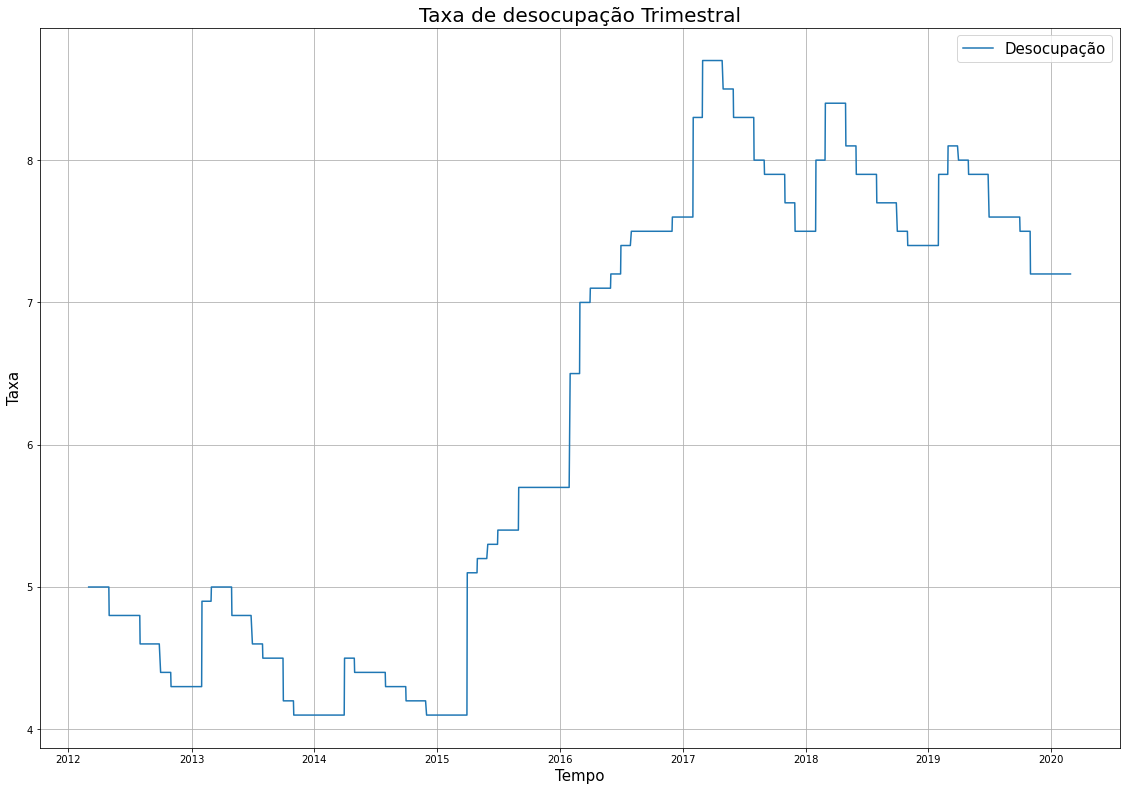

In [1078]:
fig = plt.figure(figsize = (15, 10))
gf1 = fig.add_axes([0,0,1,1])
gf1.plot(dados['Data'], dados['desocupacao_trim'])

gf1.set_title('Taxa de desocupação Trimestral', fontsize = 20)
gf1.set_ylabel('Taxa', fontsize=15)
gf1.set_xlabel('Tempo', fontsize=15)
gf1.legend(['Desocupação'], loc='best', fontsize=15)
gf1.grid(True)

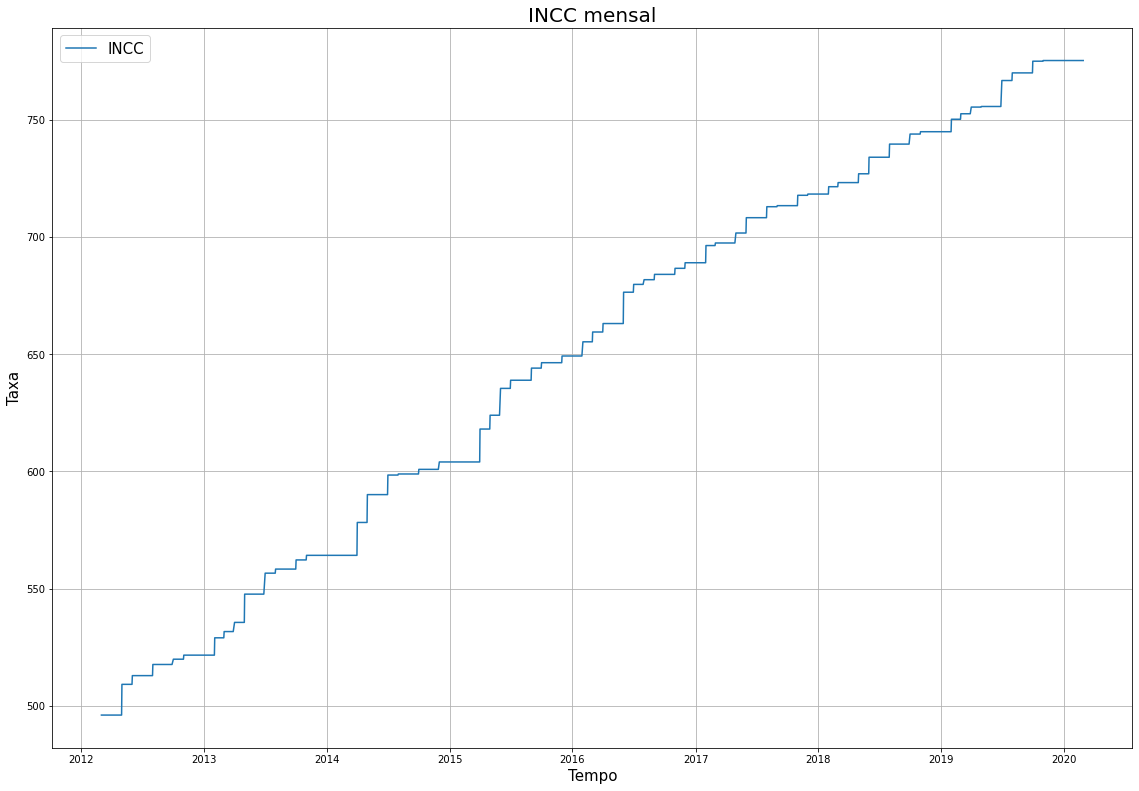

In [1079]:
fig2 = plt.figure(figsize = (15, 10))
gf2 = fig2.add_axes([0,0,1,1])
gf2.plot(dados['Data'], dados['INCC'])

gf2.set_title('INCC mensal', fontsize = 20)
gf2.set_ylabel('Taxa', fontsize=15)
gf2.set_xlabel('Tempo', fontsize=15)
gf2.legend(['INCC'], loc='best', fontsize=15)
gf2.grid(True)

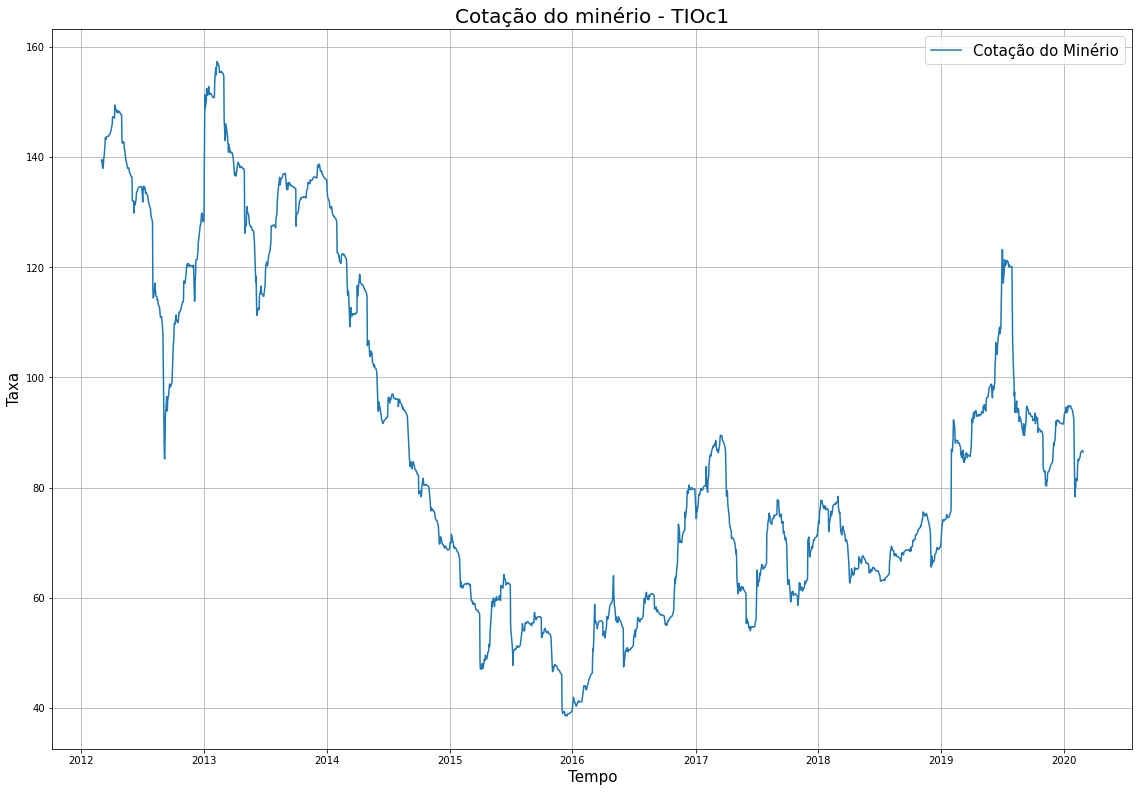

In [1080]:
fig3 = plt.figure(figsize = (15, 10))
gf3 = fig3.add_axes([0,0,1,1])
gf3.plot(dados['Data'], dados['cotacao_minerio'])

gf3.set_title('Cotação do minério - TIOc1', fontsize = 20)
gf3.set_ylabel('Taxa', fontsize=15)
gf3.set_xlabel('Tempo', fontsize=15)
gf3.legend(['Cotação do Minério'], loc='best', fontsize=15)
gf3.grid(True)

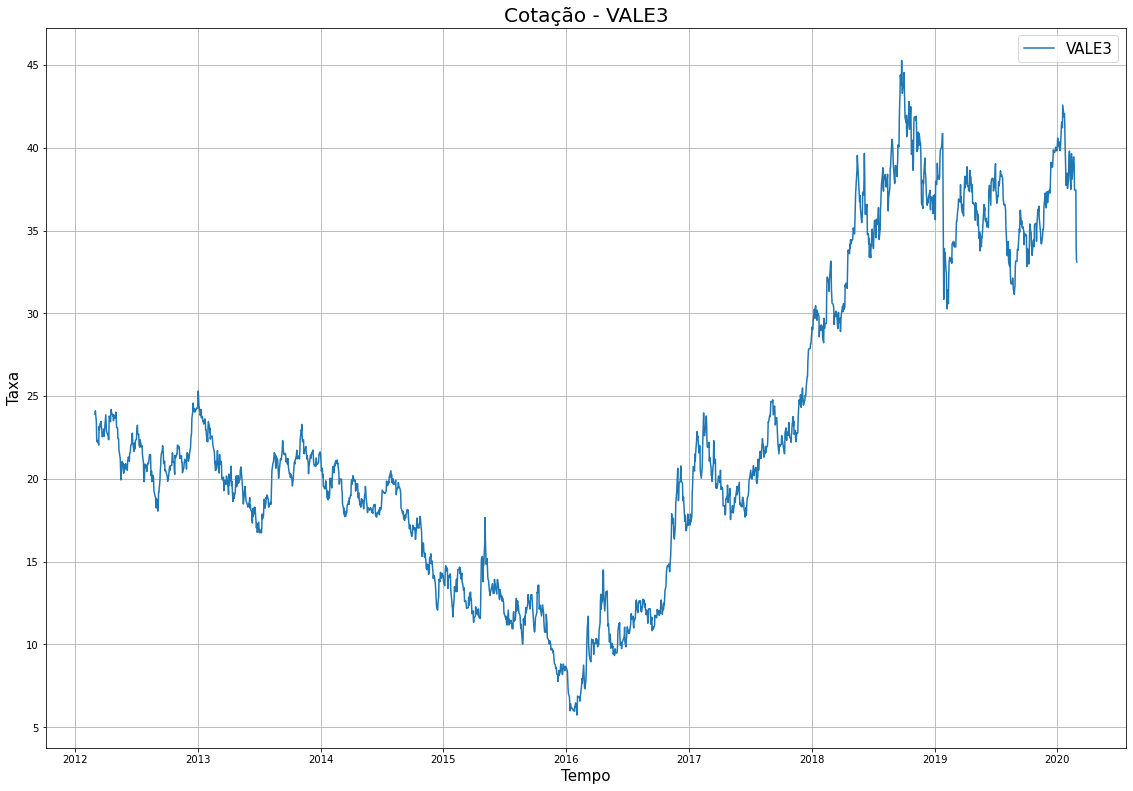

In [1081]:
fig4 = plt.figure(figsize = (15, 10))
gf4 = fig4.add_axes([0,0,1,1])
gf4.plot(dados['Data'], dados['cotacao_VALE3'])

gf4.set_title('Cotação - VALE3', fontsize = 20)
gf4.set_ylabel('Taxa', fontsize=15)
gf4.set_xlabel('Tempo', fontsize=15)
gf4.legend(['VALE3'], loc='best', fontsize=15)
gf4.grid(True)

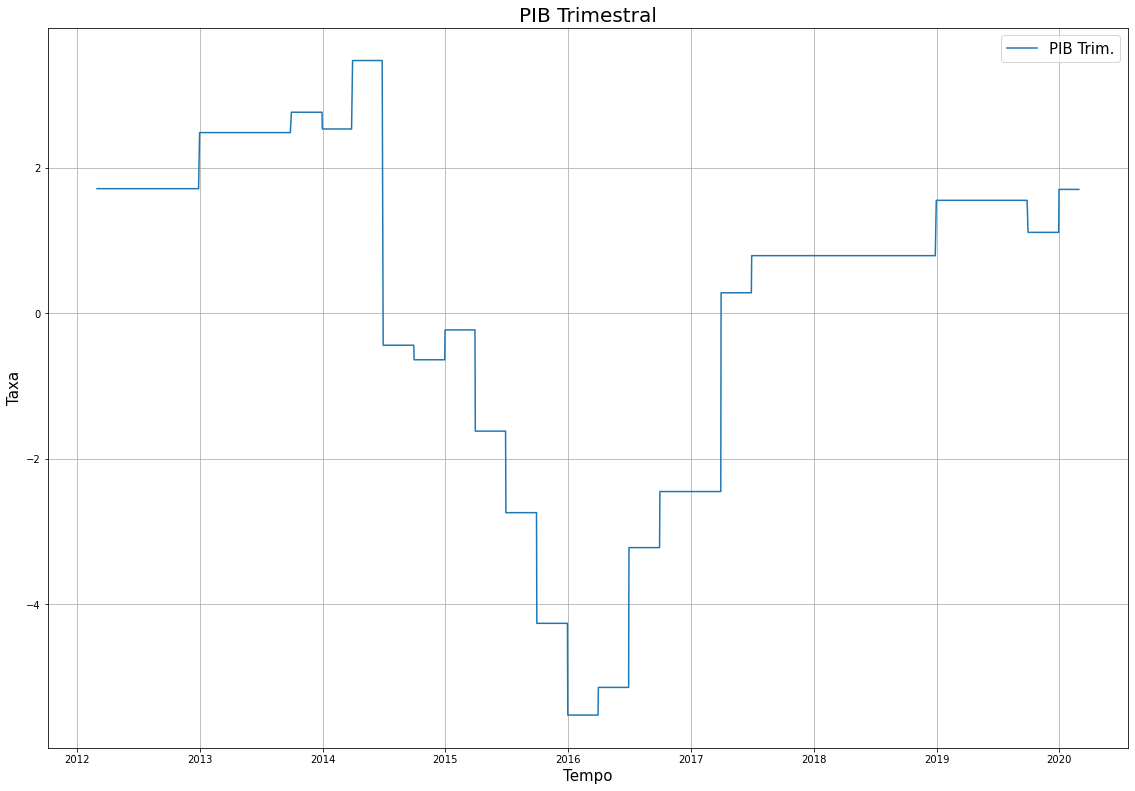

In [1082]:
fig5 = plt.figure(figsize = (15, 10))
gf5 = fig5.add_axes([0,0,1,1])
gf5.plot(dados['Data'], dados['PIB_trimestral'])

gf5.set_title('PIB Trimestral', fontsize = 20)
gf5.set_ylabel('Taxa', fontsize=15)
gf5.set_xlabel('Tempo', fontsize=15)
gf5.legend(['PIB Trim.'], loc='best', fontsize=15)
gf5.grid(True)

In [1083]:
dados

,Data,cotacao_minerio,INCC,desocupacao_trim,cotacao_VALE3,PIB_trimestral
0,2012-03-01,139.30,496.079,5.0,23.90,1.71
1,2012-03-02,139.50,496.079,5.0,24.11,1.71
2,2012-03-05,137.90,496.079,5.0,23.41,1.71
3,2012-03-06,138.20,496.079,5.0,22.27,1.71
4,2012-03-07,138.80,496.079,5.0,22.24,1.71
...,...,...,...,...,...,...
2001,2020-02-24,86.56,775.225,7.2,37.45,1.70
2002,2020-02-25,86.73,775.225,7.2,37.45,1.70
2003,2020-02-26,86.67,775.225,7.2,33.88,1.70
2004,2020-02-27,86.58,775.225,7.2,33.22,1.70


In [1101]:
# Transformação dos dados para comparação comportamental

dados2 = dados.copy()
dados2['cotacao_minerio'] = dados2['cotacao_minerio'] / dados2.loc[0][1]
dados2['INCC'] = dados2['INCC'] / dados2.loc[0][2]
dados2['desocupacao_trim'] = dados2['desocupacao_trim'] / dados2.loc[0][3]
dados2['cotacao_VALE3'] = dados2['cotacao_VALE3'] / dados2.loc[0][4]
dados2['PIB_trimestral'] = dados2['PIB_trimestral'] / dados2.loc[0][5]

([], [])

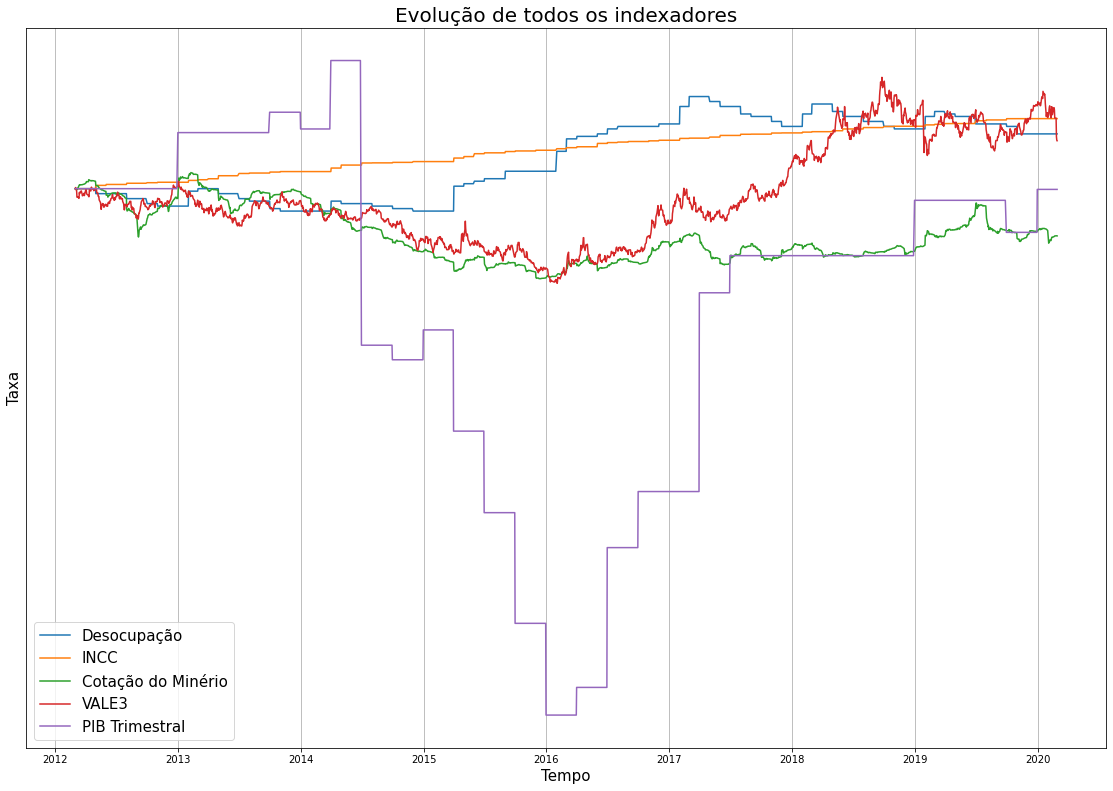

In [1102]:
fig6 = plt.figure(figsize = (15, 10))
gf6 = fig6.add_axes([0,0,1,1])
gf6.plot(dados2['Data'], dados2['desocupacao_trim'])
gf6.plot(dados2['Data'], dados2['INCC'])
gf6.plot(dados2['Data'], dados2['cotacao_minerio'])
gf6.plot(dados2['Data'], dados2['cotacao_VALE3'])
gf6.plot(dados2['Data'], dados2['PIB_trimestral'])

gf6.set_title('Evolução de todos os indexadores', fontsize = 20)
gf6.set_ylabel('Taxa', fontsize=15)
gf6.set_xlabel('Tempo', fontsize=15)
gf6.legend(['Desocupação', 'INCC', 'Cotação do Minério', 'VALE3', 'PIB Trimestral'], loc='best', fontsize=15)
gf6.grid(True)
plt.yticks([])

In [1098]:
# Salvando arquivo CSV para regressão futura.
dados.to_csv('dados.csv')